Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# **HW 2: Decision Trees and Overfitting**
**HW Due date is 03/04/2024, 1:59 pm**

Objective:
* To understand the basics of decision trees and Hunt's algorithm.
* To practice building decision trees using sample datasets.
* To visualize model performance and apply pre-pruning and post-pruning techniques to tackle overfitting issues.

In [3]:
# Import the neccesary libraries
import matplotlib.pyplot as plt
import numpy as np

# Creating a Dataset:
Two class problem:

1400 instances of blue class
* 1000 instances generated from a Gaussian centered at (10,10)
* 400 noisy instances added

1400 instances of green class
* Generated from a uniform distribution in (0,20) coordinates

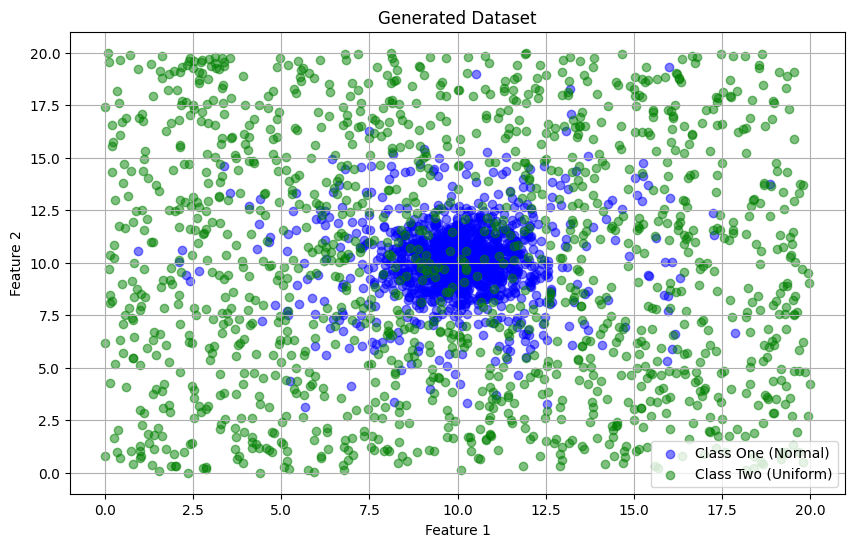

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate instances for class one using normal distribution
class_one_mean = (10, 10)  # Center around (10, 10)
class_one_std = 1
class_one_instances = 1000
class_one = np.random.normal(loc=class_one_mean, scale=class_one_std, size=(class_one_instances, 2))

# Generate noisy instances for class one
noisy_instances = 400
class_one_noisy = np.random.normal(loc=(0, 0), scale=3, size=(noisy_instances, 2))

# Generate instances for class two using uniform distribution in a [0,20] range]
class_two_instances = 1400
class_two = np.random.uniform(low=0, high=20, size=(class_two_instances, 2))

# Concatenate class one instances and noisy instances
X_class_one = np.vstack((class_one, class_one_noisy + class_one_mean))  # Adjusting mean to add noise
y_class_one = np.zeros(X_class_one.shape[0])  # Label for class one is 0

# Labels for class two are 1
X_class_two = class_two
y_class_two = np.ones(class_two.shape[0])

# Concatenate features and labels for both classes
X = np.vstack((X_class_one, X_class_two))
y = np.concatenate((y_class_one, y_class_two))


# Visualize the data
plt.figure(figsize=(10, 6))

# Plot instances for class one
plt.scatter(X_class_one[:, 0], X_class_one[:, 1], color='blue', label='Class One (Normal)', alpha=0.5)

# Plot instances for class two
plt.scatter(X_class_two[:, 0], X_class_two[:, 1], color='green', label='Class Two (Uniform)', alpha=0.5)

plt.title('Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


The default values for the DecisionTreeClassifier in scikit-learn are as follows:

**criterion:** The function to measure the quality of a split. By default, it is set to 'gini', which measures the impurity of the split based on the Gini impurity criterion. Alternatively, you can set it to 'entropy' to use information gain.

**splitter:** The strategy used to choose the split at each node. By default, it is set to 'best', which chooses the best split. Alternatively, you can set it to 'random' to choose the best random split.

**max_depth:** The maximum depth of the tree. By default, it is set to 'None', meaning nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_split:** The minimum number of samples required to split an internal node. By default, it is set to 2, meaning nodes with fewer than 2 samples are not split further.

**min_samples_leaf:** The minimum number of samples required to be at a leaf node. By default, it is set to 1, meaning nodes will continue to be split until each leaf node contains 1 sample.

**max_features:** The number of features to consider when looking for the best split. By default, it is set to 'None', meaning all features are considered.
random_state: The seed of the random number generator. By default, it is set to 'None'.

**max_leaf_nodes:** The maximum number of leaf nodes in the tree. By default, it is set to 'None', meaning unlimited number of leaf nodes.

**min_impurity_decrease:** A node will be split if this split induces a decrease of the impurity greater than or equal to this value. By default, it is set to 0.0.

**ccp_alpha:** Complexity parameter used for Minimal Cost-Complexity Pruning. By default, it is set to 0.0.

These are the primary parameters, but there are others as well, and you can refer to the scikit-learn documentation for more details.

**Coding Exersice:** Train a decisoin tree with default parameters from DecisionTreeClassifier in sklearn library. Show the accuracy results for both training and test sets.

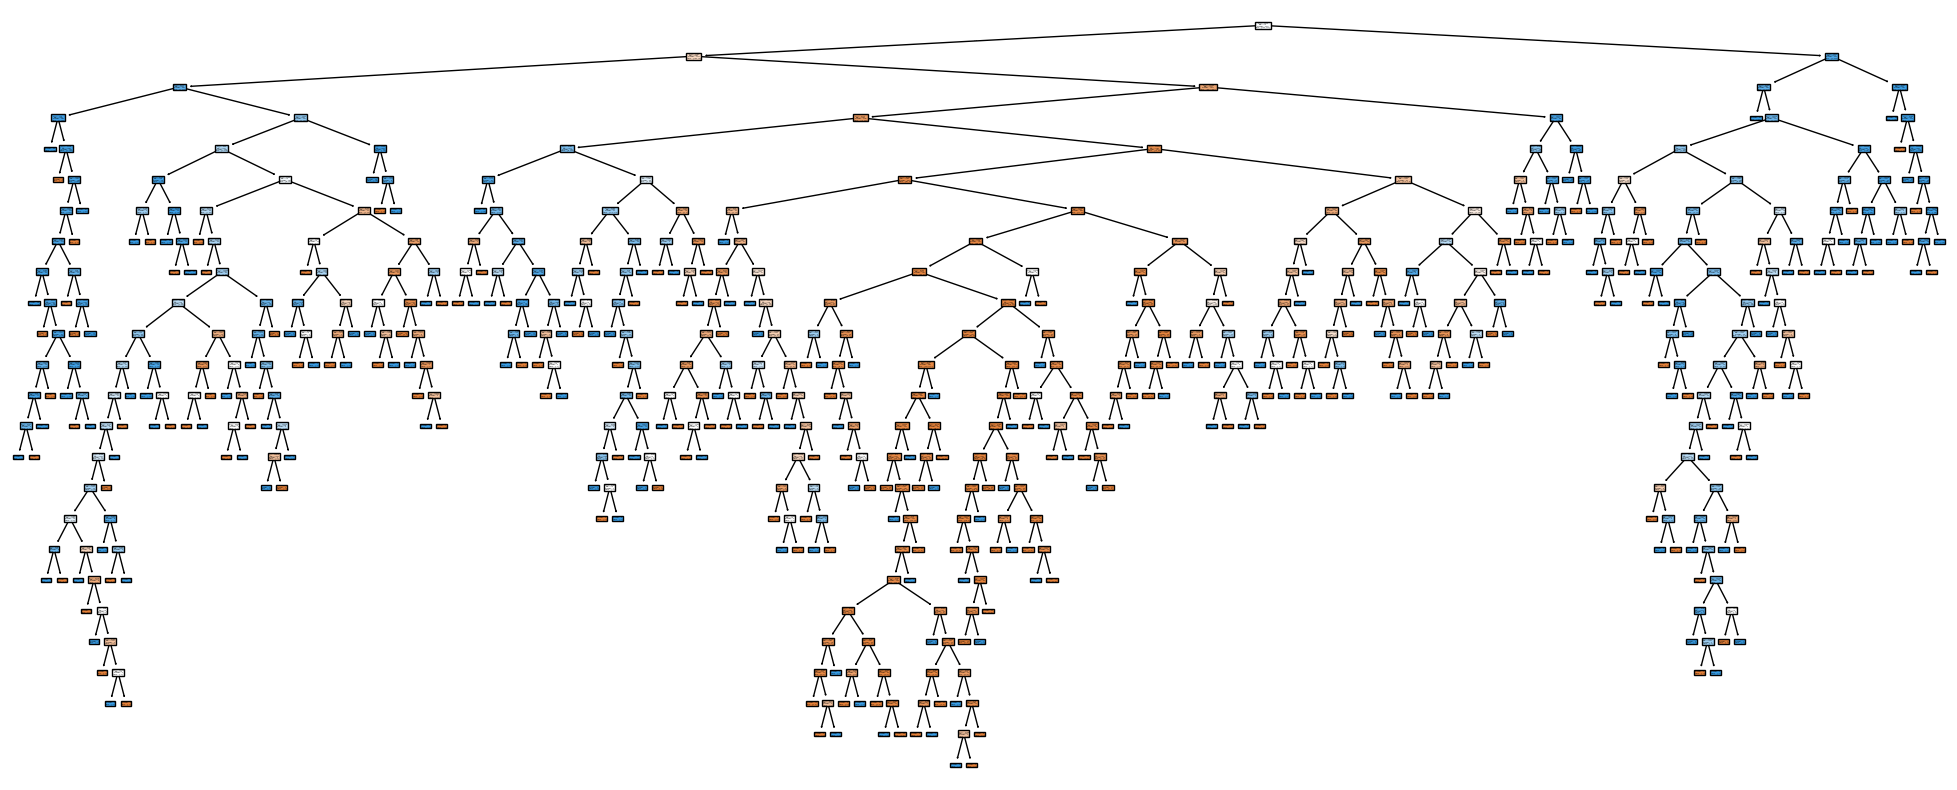

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets with 20% test and 80% training
#You code starts here
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=42)
#Your code ends here

# Train a decision tree classifier with default parameters
#You code starts here
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
#Your code ends here

# Evaluate the classifier on the training set
#You code starts here
y_train_pred = clf.predict(x_train)
accuracy_score(y_train, y_train_pred)
#Your code ends here

# Evaluate the classifier on the testing set
#You code starts here
y_test_pred = clf.predict(x_test)
accuracy_score(y_test, y_test_pred)
#Your code ends here


# Visualize the learned tree
""" use plot_tree from sklearn.tree """
#You code starts here
plt.figure(figsize=(25, 10))
plot_tree(clf, filled=True)
plt.show()
#Your code ends here

**Coding Exersice:** Perform sensitivity analysis over over $\textit{'max_depth'} $ hyperparameter for both training and test errors in the same figure. You need to calculate the errors for both sets.

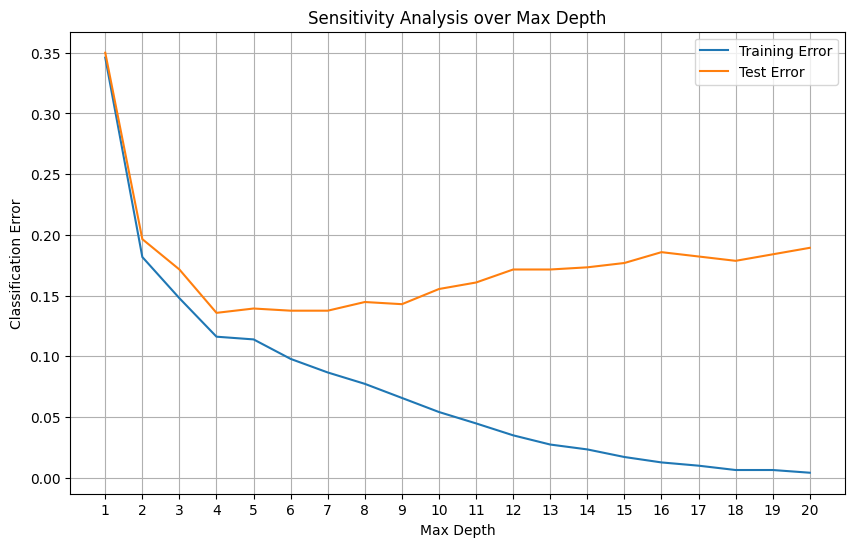

In [14]:
# Define the range of max_depth values to test
max_depth_values = range(1, 21)  # Test max_depth from 1 to 20

# Initialize lists to store training and test errors
training_errors = []
test_errors = []

# Split the dataset into training and testing sets with 20% test and 80% training
#You code starts here
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=42)
#Your code ends here

# Iterate over each max_depth value
#You code starts here
for max_depth in max_depth_values:
    # Train a decision tree classifier with the current max_depth value
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(x_train, y_train)

    # Evaluate the classifier on the training set
    y_train_pred = clf.predict(x_train)
    training_errors.append(1 - accuracy_score(y_train, y_train_pred))

    # Evaluate the classifier on the test set
    y_test_pred = clf.predict(x_test)
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

#Your code ends here

# Plot the sensitivity analysis results

plt.figure(figsize=(10, 6))
#You code starts here
plt.plot(max_depth_values, training_errors, label='Training Error')
plt.plot(max_depth_values, test_errors, label='Test Error')
#Your code ends here
plt.title('Sensitivity Analysis over Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Classification Error')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()



**Coding Exersice:** Re-train the decision tree with $\textit{'max_depth'} $ of 20. Show the accuracy results for both training and test sets.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets with 20% test and 80% training
#You code starts here
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=42)
#Your code ends here

# Train a decision tree classifier with a maximum depth of 20
#You code starts here
clf = DecisionTreeClassifier(max_depth=20, random_state=42)
clf.fit(x_train, y_train)
#Your code ends here

# Evaluate the classifier on the training set
#You code starts here
y_train_pred = clf.predict(x_train)
print(f"Accuracy score for training set = {accuracy_score(y_train, y_train_pred)}")
#Your code ends here

# Evaluate the classifier on the testing set
#You code starts here
y_test_pred = clf.predict(x_test)
print(f"Accuracy score for test set = {accuracy_score(y_test, y_test_pred)}")
#Your code ends here

Accuracy score for training set = 0.9959821428571428
Accuracy score for training set = 0.8107142857142857


**Question:** Do you see any gap between the accuracies of the training and test sets? If yes, what is the cause of this difference? Explain.

**Answer:** Yes, there is a gap between the training and test sets. The training set is nearly at 100% accuracy while the test set is at 81%. This is caused by overfitting because the model gets more complex. As we introduce a larger max_depth it captures unwanted noise from the training set.

**Coding Exersice:** Re-train the decision tree with $\textit{'max_depth'} $ of 4. Show the accuracy results for both training and test sets.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets with 20% test and 80% training
#You code starts here

#You code ends here

# Train a decision tree classifier with a maximum depth of 4
#You code starts here

#You code ends here

# Evaluate the classifier on the training set
#You code starts here

#You code ends here

# Evaluate the classifier on the testing set
#You code starts here

#You code ends here

**Question:** How is the gap now? Is your test set accuracy better? why is that? Explain.

**Answer:** Your answer goes here!

**Post-Pruning:** To apply post-pruning to the decision tree with 'max_depth' of 20, you can use the ccp_alpha parameter, which stands for Complexity Cost Pruning. This parameter controls the threshold for pruning. As the threshold increases, more nodes are pruned, leading to a simpler tree.

Here's how you can apply post-pruning with a maximum size of 20 using the DecisionTreeClassifier in scikit-learn:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets with 20% test and 80% training
#You code starts here

#You code ends here

# Train a decision tree classifier with a maximum size of 20
""" You can use the same code as before. You have already trained this model."""
#You code starts here

#You code ends here

# Apply post-pruning with different ccp_alpha values
""" use tree_clf.cost_complexity_pruning_path , then capture ccp_alphas """
#You code starts here

#You code ends here

# Initialize lists to store accuracy scores
accuracy_scores = []

# Iterate over different ccp_alpha values and retrain the decision tree and print out the accuracy of the retrained model
#You code starts here
for ccp_alpha in ccp_alphas:

    print(f"Accuracy for ccp_alpha={ccp_alpha}: {accuracy_pruned}")
#You code ends here

**Question:** How the accuracy is changing with respect to different values of 'ccp_alpha'? What is the best accuracy you get? Isn't that close to the accuracy you had for 'max_depth' of 4 ? why this happened (i.e., accuracy imporved for the model with 'max_depth' of 20 after post-pruning)?

**Answer:** Your answer goes here!